In [1365]:
import pandas as pd
# machine learning
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

scoring = 'accuracy'

In [1366]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [1367]:
train.set_index("PassengerId")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [1368]:
nameLength = []
for name in train["Name"]:
    nameLength.append(len(name))

In [1369]:
train["NameLength"] = nameLength

In [1370]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [1371]:
EmbarkedList = []
for embarked in train["Embarked"]:
    result = 3
    if embarked == "Q":
        result = 0
    elif embarked == "C":
        result = 1
    else:
        result = 0
    EmbarkedList.append(result)

In [1372]:
train["Embarked"] = EmbarkedList

In [1373]:
SexList = []
for sex in train["Sex"]:
    result = 0
    if sex == "male":
        result = 1
    SexList.append(result)

In [1374]:
train["Sex"] = SexList

In [1375]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
train = train.drop(["SibSp", "Parch"], axis=1)

In [1376]:
cabin_no = train[train["Cabin"].isnull()]
cabin_yes = train[train["Cabin"].notnull()]

In [1377]:
import numpy as np

In [1378]:
CabinExist = []
cnt = 0
for cabin in train["Cabin"]:
    result = 0
    if type(cabin) is str:
        result = 1
    CabinExist.append(result)

In [1379]:
train["CabinExist"] = CabinExist
train = train.drop(["Cabin"], axis=1)

In [1380]:
TicketLength = []
for ticket in train["Ticket"]:
    TicketLength.append(len(ticket))

In [1381]:
train["TicketLength"] = TicketLength

In [1382]:
NumberTicket = []
isNumberTicket = train["Ticket"].str.contains(pat = '^[0-9]*$', regex = True)
for item in isNumberTicket:
    result = 0
    if item:
        result = 1
    NumberTicket.append(result)

In [1383]:
train["NumberTicket"] = NumberTicket

In [1384]:
age_no = train[train["Age"].isnull()]
age_yes = train[train["Age"].notnull()]

In [1385]:
age_yes.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,NameLength,FamilySize,CabinExist,TicketLength,NumberTicket
PassengerId,1.000000,0.029340,-0.035349,0.024575,0.036847,0.009592,0.008638,-0.008268,-0.058314,0.015261,-0.052818,0.081835
Survived,0.029340,1.000000,-0.359653,-0.538826,-0.077221,0.268189,0.193607,0.305681,0.042787,0.324530,-0.034668,-0.029606
Pclass,-0.035349,-0.359653,1.000000,0.155460,-0.369226,-0.554182,-0.276294,-0.190945,0.056909,-0.739512,0.086269,0.059039
Sex,0.024575,-0.538826,0.155460,1.000000,0.093254,-0.184994,-0.101580,-0.445458,-0.207165,-0.148511,0.082617,-0.036346
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,0.096067,0.036261,0.034612,-0.301914,0.249732,-0.024086,-0.029886
Fare,0.009592,0.268189,-0.554182,-0.184994,0.096067,1.000000,0.299797,0.136787,0.204640,0.492069,-0.035354,-0.141124
Embarked,0.008638,0.193607,-0.276294,-0.101580,0.036261,0.299797,1.000000,0.045698,-0.033575,0.259406,-0.058768,-0.137778
NameLength,-0.008268,0.305681,-0.190945,-0.445458,0.034612,0.136787,0.045698,1.000000,0.273916,0.179367,-0.037581,-0.013761
FamilySize,-0.058314,0.042787,0.056909,-0.207165,-0.301914,0.204640,-0.033575,0.273916,1.000000,-0.005683,-0.048597,0.015287
CabinExist,0.015261,0.324530,-0.739512,-0.148511,0.249732,0.492069,0.259406,0.179367,-0.005683,1.000000,-0.105653,-0.014345


In [1386]:
lm = LinearRegression()
# age_x = age_yes[["Pclass", "FamilySize", "CabinExist"]]
age_x = age_yes[["Pclass", "FamilySize", "CabinExist"]]
age_y = age_yes["Age"]
lm.fit(age_x, age_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1387]:
# age_predict = lm.predict(age_no[["Pclass", "FamilySize", "CabinExist"]])
age_predict = lm.predict(age_no[["Pclass", "FamilySize", "CabinExist"]])

In [1388]:
age_no["Age"] = age_predict

/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1389]:
train = pd.concat([age_no, age_yes])

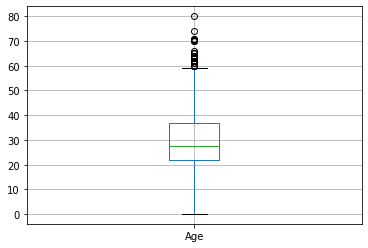

In [1390]:
train.boxplot(column=["Age"])

In [1391]:
AgeList = []
for age in train["Age"]:
    result = 0
    if age > 65:
        result = 6        
    elif age > 55:
        result = 5        
    elif age > 45:
        result = 4        
    elif age > 35:
        result = 3        
    elif age > 25:
        result = 2   
    elif age > 15:
        result = 1
    else:
        result = 0
    AgeList.append(result)

In [1392]:
train["Age2"] = AgeList

In [1393]:
train["Age2"].value_counts()

2    306
1    248
3    144
0     90
4     63
5     32
6      8
Name: Age2, dtype: int64

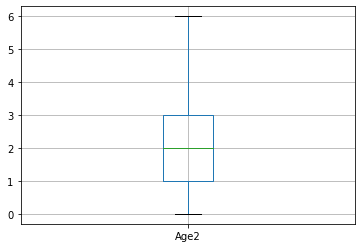

In [1394]:
train.boxplot(column=["Age2"])

In [1395]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,NameLength,FamilySize,CabinExist,TicketLength,NumberTicket,Age2
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033423,0.012658,-0.001205,-0.012986,-0.040143,0.019919,-0.046022,0.072291,0.033968
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.044794,0.257307,0.168240,0.332350,0.016639,0.316912,-0.055331,0.001492,-0.046605
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.402575,-0.549500,-0.243292,-0.220001,0.065997,-0.725541,0.054098,0.079763,-0.398844
Sex,0.042939,-0.543351,0.131900,1.000000,0.094676,-0.182333,-0.082853,-0.448759,-0.200988,-0.140391,0.080280,-0.032507,0.105048
Age,0.033423,-0.044794,-0.402575,0.094676,1.000000,0.098743,0.047999,0.043988,-0.355185,0.265217,-0.020042,-0.011240,0.969017
Fare,0.012658,0.257307,-0.549500,-0.182333,0.098743,1.000000,0.269335,0.155832,0.217138,0.482075,-0.016002,-0.173170,0.097748
Embarked,-0.001205,0.168240,-0.243292,-0.082853,0.047999,0.269335,1.000000,0.027481,-0.046215,0.208528,-0.086939,-0.115615,0.044692
NameLength,-0.012986,0.332350,-0.220001,-0.448759,0.043988,0.155832,0.027481,1.000000,0.238820,0.190943,-0.017184,-0.032901,0.029812
FamilySize,-0.040143,0.016639,0.065997,-0.200988,-0.355185,0.217138,-0.046215,0.238820,1.000000,-0.009175,-0.019576,-0.073068,-0.306566
CabinExist,0.019919,0.316912,-0.725541,-0.140391,0.265217,0.482075,0.208528,0.190943,-0.009175,1.000000,-0.092648,-0.008180,0.279124


In [1396]:
train["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.0458      1
13.8625     1
8.7125      1
13.8583     1
8.1375      1
Name: Fare, Length: 248, dtype: int64

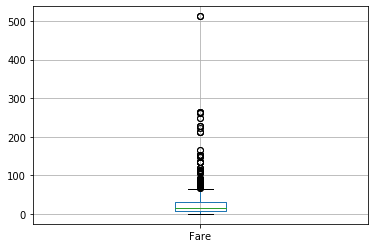

In [1397]:
train.boxplot(column=["Fare"])

In [1398]:
train["Fare"].median()

14.4542

In [1399]:
FareList = []
for age in train["Fare"]:
    result = 0
    if age > 100:
        result = 6    
    elif age > 70:
        result = 5        
    elif age > 40:
        result = 4
    elif age > 25:
        result = 3
    elif age > 10:
        result = 2
    elif age > 5:
        result = 1
    else:
        result = 0
    FareList.append(result)

In [1400]:
train["Fare2"] = FareList

In [1401]:
train["Fare2"].value_counts()

1    319
2    221
3    158
4     71
6     53
5     52
0     17
Name: Fare2, dtype: int64

In [1402]:
train.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,NameLength,FamilySize,CabinExist,TicketLength,NumberTicket,Age2,Fare2
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033423,0.012658,-0.001205,-0.012986,-0.040143,0.019919,-0.046022,0.072291,0.033968,-0.002836
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.044794,0.257307,0.168240,0.332350,0.016639,0.316912,-0.055331,0.001492,-0.046605,0.337733
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.402575,-0.549500,-0.243292,-0.220001,0.065997,-0.725541,0.054098,0.079763,-0.398844,-0.753221
Sex,0.042939,-0.543351,0.131900,1.000000,0.094676,-0.182333,-0.082853,-0.448759,-0.200988,-0.140391,0.080280,-0.032507,0.105048,-0.258126
Age,0.033423,-0.044794,-0.402575,0.094676,1.000000,0.098743,0.047999,0.043988,-0.355185,0.265217,-0.020042,-0.011240,0.969017,0.145953
Fare,0.012658,0.257307,-0.549500,-0.182333,0.098743,1.000000,0.269335,0.155832,0.217138,0.482075,-0.016002,-0.173170,0.097748,0.780401
Embarked,-0.001205,0.168240,-0.243292,-0.082853,0.047999,0.269335,1.000000,0.027481,-0.046215,0.208528,-0.086939,-0.115615,0.044692,0.270842
NameLength,-0.012986,0.332350,-0.220001,-0.448759,0.043988,0.155832,0.027481,1.000000,0.238820,0.190943,-0.017184,-0.032901,0.029812,0.284455
FamilySize,-0.040143,0.016639,0.065997,-0.200988,-0.355185,0.217138,-0.046215,0.238820,1.000000,-0.009175,-0.019576,-0.073068,-0.306566,0.346924
CabinExist,0.019919,0.316912,-0.725541,-0.140391,0.265217,0.482075,0.208528,0.190943,-0.009175,1.000000,-0.092648,-0.008180,0.279124,0.611551


In [1403]:
x = train[["Sex", "Pclass", "Fare2", "CabinExist", "Embarked"]]
y = train["Survived"]

In [1404]:
lf = RandomForestClassifier()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.73333333 0.78651685 0.85393258 0.84269663 0.74157303 0.78651685
 0.75280899 0.78651685 0.84269663 0.80898876]


/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


79.36

In [1405]:
lf = KNeighborsClassifier()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.7        0.78651685 0.82022472 0.83146067 0.78651685 0.7752809
 0.73033708 0.79775281 0.84269663 0.75280899]


78.24

In [1406]:
lf = DecisionTreeClassifier()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.74444444 0.78651685 0.87640449 0.84269663 0.75280899 0.78651685
 0.75280899 0.78651685 0.78651685 0.78651685]


79.02

In [1407]:
lf = GaussianNB()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.7        0.80898876 0.83146067 0.79775281 0.70786517 0.73033708
 0.73033708 0.76404494 0.6741573  0.71910112]


74.64

In [1408]:
lf = SVC()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.75555556 0.80898876 0.86516854 0.84269663 0.78651685 0.80898876
 0.75280899 0.80898876 0.83146067 0.82022472]


/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/skyepodium/opt/anacon

80.81

In [1409]:
lf = LogisticRegression()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarn

[0.74444444 0.79775281 0.85393258 0.80898876 0.75280899 0.79775281
 0.74157303 0.78651685 0.80898876 0.78651685]


/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


78.79

In [1410]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [1411]:
test["Fare"].fillna("14", inplace=True)

In [1412]:
test["FamilySize"] = test["SibSp"] + test["Parch"]
test = test.drop(["SibSp", "Parch"], axis=1)

In [1413]:
TicketLength = []
for ticket in test["Ticket"]:
    TicketLength.append(len(ticket))
test["TicketLength"] = TicketLength

In [1414]:
CabinExist = []
cnt = 0
for cabin in test["Cabin"]:
    result = 0
    if type(cabin) is str:
        result = 1
    CabinExist.append(result)
test["CabinExist"] = CabinExist
test = test.drop(["Cabin"], axis=1)

In [1415]:
SexList = []
for sex in test["Sex"]:
    result = 0
    if sex == "male":
        result = 1
    SexList.append(result)
test["Sex"] = SexList

In [1416]:
EmbarkedList = []
for embarked in test["Embarked"]:
    result = 3
    if embarked == "Q":
        result = 0
    elif embarked == "C":
        result = 1
    else:
        result = 0
    EmbarkedList.append(result)
test["Embarked"] = EmbarkedList

In [1417]:
nameLength = []
for name in test["Name"]:
    nameLength.append(len(name))
test["NameLength"] = nameLength

In [1418]:
test_age_no = test[test["Age"].isnull()]
test_age_yes = test[test["Age"].notnull()]

In [1419]:
age_predict = lm.predict(test_age_no[["Pclass", "FamilySize", "CabinExist"]])

In [1420]:
test_age_no["Age"] = age_predict

/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1421]:
test = pd.concat([test_age_no, test_age_yes])

In [1422]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,TicketLength,CabinExist,NameLength
10,902,3,"Ilieff, Mr. Ylio",1,27.586516,349220,7.8958,0,0,6,0,16
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",0,40.570481,PC 17598,31.6833,0,0,8,0,36
29,921,3,"Samaan, Mr. Elias",1,22.089172,2662,21.6792,1,2,4,0,17
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",0,19.340500,W./C. 6607,23.45,0,3,10,0,49
36,928,3,"Roth, Miss. Sarah A",0,27.586516,342712,8.05,0,0,6,0,19


In [1423]:
FareList = []
for age in test["Fare"]:
    age = int(age)
    result = 0
    if age > 100:
        result = 6    
    elif age > 70:
        result = 5        
    elif age > 40:
        result = 4
    elif age > 25:
        result = 3
    elif age > 10:
        result = 2
    elif age > 5:
        result = 1
    else:
        result = 0
    FareList.append(result)
test["Fare2"] = FareList

In [1424]:
AgeList = []
for age in test["Age"]:
    result = 0
    if age > 65:
        result = 6        
    elif age > 55:
        result = 5        
    elif age > 45:
        result = 4        
    elif age > 35:
        result = 3        
    elif age > 25:
        result = 2   
    elif age > 15:
        result = 1
    else:
        result = 0
    AgeList.append(result)
test["Age2"] = AgeList

In [1425]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,TicketLength,CabinExist,NameLength,Fare2,Age2
10,902,3,"Ilieff, Mr. Ylio",1,27.586516,349220,7.8958,0,0,6,0,16,1,2
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",0,40.570481,PC 17598,31.6833,0,0,8,0,36,3,3
29,921,3,"Samaan, Mr. Elias",1,22.089172,2662,21.6792,1,2,4,0,17,2,1
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",0,19.340500,W./C. 6607,23.45,0,3,10,0,49,2,1
36,928,3,"Roth, Miss. Sarah A",0,27.586516,342712,8.05,0,0,6,0,19,1,2


In [1426]:
x_test = test[["Pclass", "Sex", "Fare2", "CabinExist", "Embarked"]]

In [1427]:
lf = SVC()
lf.fit(x, y)
scoring = 'accuracy'
score = cross_val_score(lf, x, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

round(np.mean(score)*100, 2)

[0.75555556 0.80898876 0.86516854 0.84269663 0.78651685 0.80898876
 0.75280899 0.80898876 0.83146067 0.82022472]


/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/skyepodium/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/skyepodium/opt/anacon

80.81

In [1428]:
result = lf.predict(x_test)

In [1429]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": result
})
submission.to_csv('03142140.csv', index=False)  

In [1430]:
submission.head()

,PassengerId,Survived
10,902,0
22,914,0
29,921,0
33,925,0
36,928,0
